Netflix is one of the world's leading streaming platforms. Netflix has evolved over the last 2 decades offering a vast library of movies, TV shows and documentaries. Understanding Netflix's content trends and genre distribution can offer valuable insights such as user preference on a specific kind of movie.

Most Netflix content comes from the United States, our hypothesis for this project is can we find a second country that produces the most PG-13 movie content assuming that the largest is the United States?

In this project we will use pandas, matplotlib, and seaborn to perform exploratory data analysis and visual exploration on a sample dataset from Netflix to accomplish our goal.

Audience: Non-Technical

Lets import our libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import chardet

In [2]:
with open('Downloads/Netflix_Data_Storytelling/netflix_titles.csv', 'rb') as f:
    result = chardet.detect(f.read(10000)) #sample 10KB
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


Lets load the dataset and see what we can find.

In [3]:
df = pd.read_csv('Downloads/Netflix_Data_Storytelling/netflix_titles.csv')

In [4]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [5]:
df.shape

(8807, 12)

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Printing the first 5 rows of the dataframe, we can see have a bunch of missing values in multiple columns.

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

We have a bunch of missing values but no duplicates. Lets fix the missing values by replacing them with unknown.

In [13]:
df = df.copy()
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now that we have cleaned the data, let's see the distribution of content in the dataset.

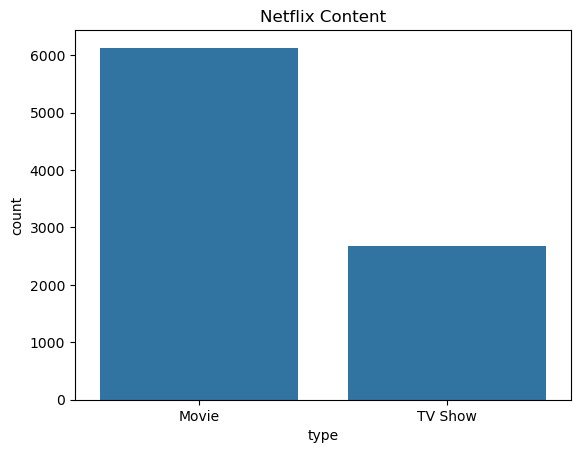

In [15]:
sns.countplot(x='type', data=df)
plt.title('Netflix Content')
plt.show()

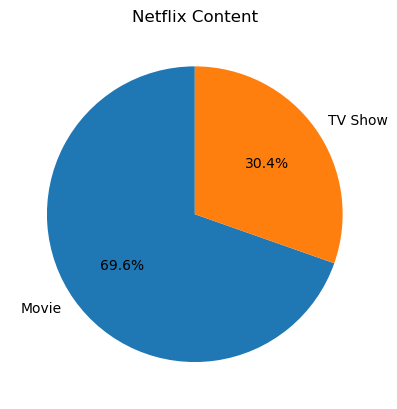

In [25]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Netflix Content')
plt.ylabel('')
plt.show()

We can see that Netflix's content has more movies than TV shows on there platform. Let's see the top 10 countries that are producing content.

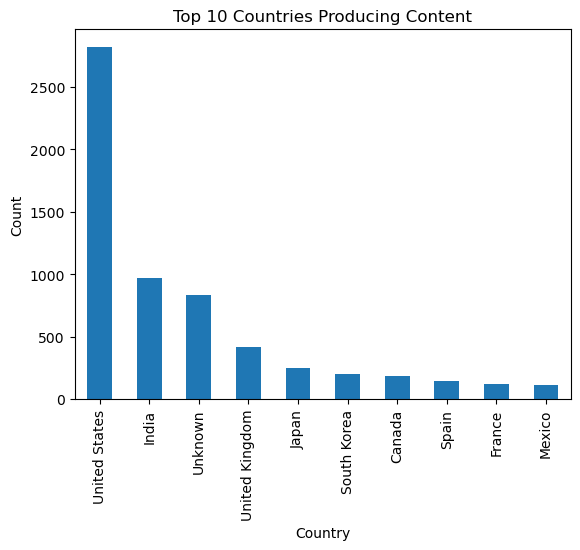

In [16]:
top10countries = df['country'].value_counts().head(10)
top10countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

So far we see that the top country producing content for Netflix is the United States and the second country is India. This brings us one step closer to solving our hypothesis. Let's see the distribution of movie ratings in the dataset.

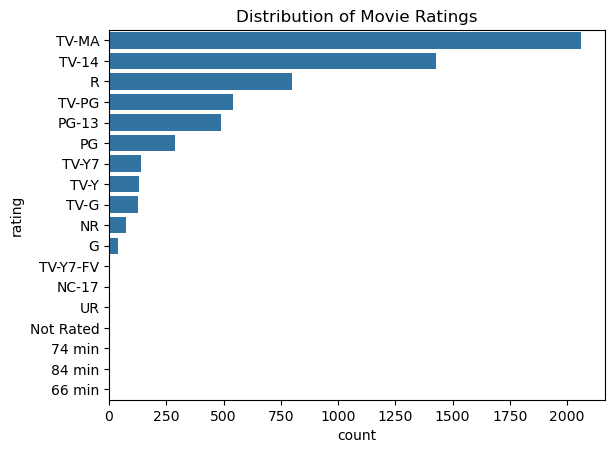

In [23]:
movieratings = df[df['type'] == 'Movie'][['rating']]

sns.countplot(y=movieratings['rating'], data=movieratings, order=movieratings['rating'].value_counts().index)
plt.title('Distribution of Movie Ratings')
plt.show()

We can see that TV-MA has the highest amount at 2000 movies for movie ratings in the dataset and there are about 500 movies rated PG-13.

So we see that India is the second largest country in producing content for netflix. Is this true for PG-13 movies? Let's find the countries producing PG-13 movies.

In [33]:
pg13 = df[(df['type'] == 'Movie') & (df['rating'] == 'PG-13')][['type', 'rating', 'country']]

pg13

,type,rating,country
0,Movie,PG-13,United States
9,Movie,PG-13,United States
27,Movie,PG-13,United States
28,Movie,PG-13,United States
29,Movie,PG-13,"United States, India, France"
...,...,...,...
8757,Movie,PG-13,United States
8764,Movie,PG-13,United States
8766,Movie,PG-13,United States
8767,Movie,PG-13,United States


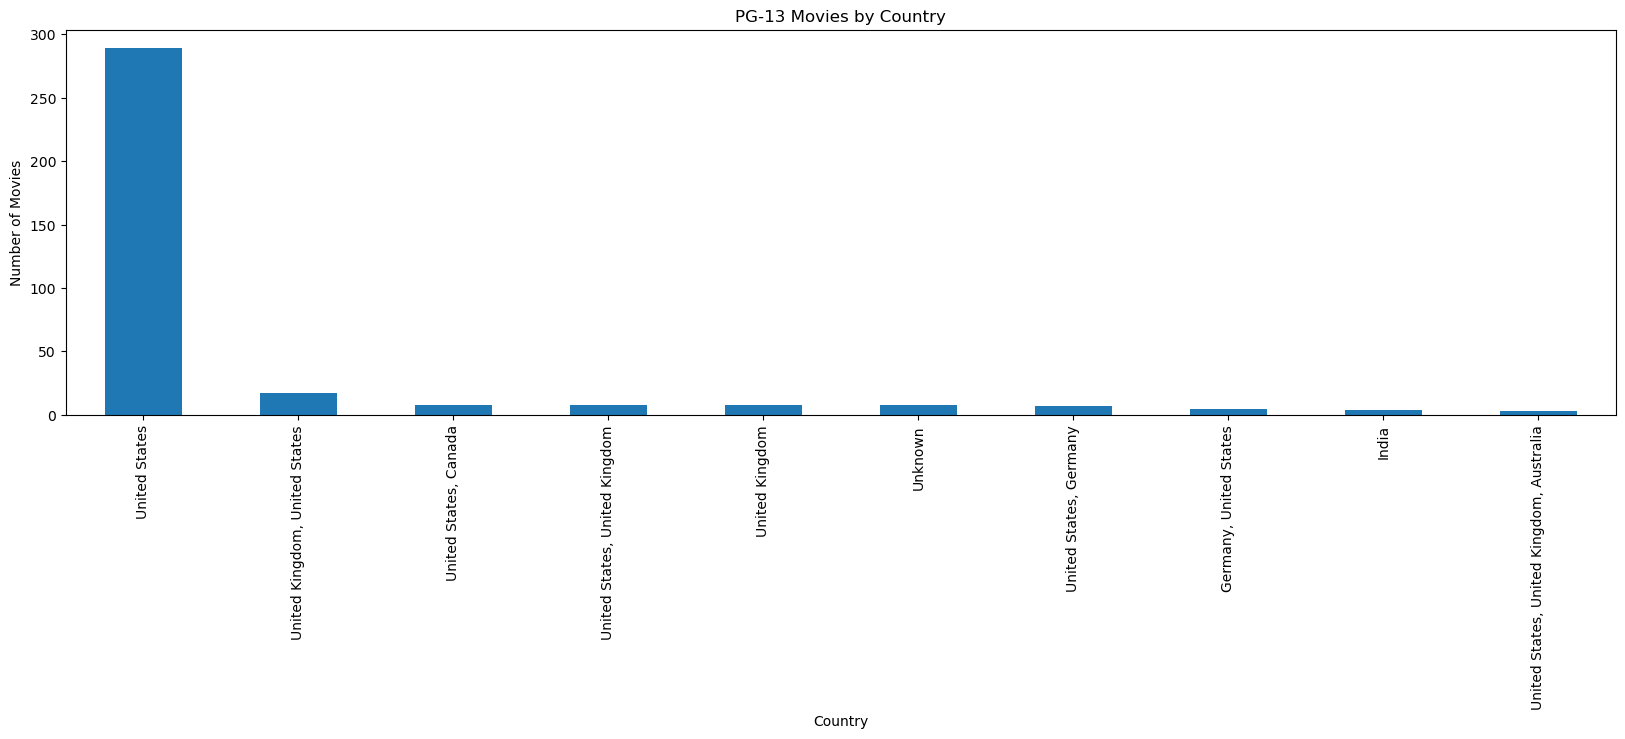

In [34]:
plt.figure(figsize=(20,5))
pg13['country'].value_counts().head(10).plot(kind='bar')
plt.title('PG-13 Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()


We see that the largest producer of PG-13 movies is the United States. Even though India is the second largest country in producing content for Netflix, it is not the second largest in producing PG-13 movies. The United Kingdom is the second largest country in producing PG-13 Movies for Netflix. There were also quite a few PG-13 movies that were produced in 2 or more countries which is interesting.

Let's see what PG-13 Movies were produced in the United Kingdom.

In [44]:
filter_uk = df[
    (df['rating'] == 'PG-13') &
    (df['type'] == 'Movie') &
    (df['country'] == 'United Kingdom')
]['title'].reset_index(drop=True)

print("PG-13 UK Movies:")
print(filter_uk)
      

PG-13 UK Movies:
0                Quartet
1                The Dig
2             Effie Gray
3    Fisherman's Friends
4                Rebecca
5           Enola Holmes
6         Rising Phoenix
7         Mansfield Park
Name: title, dtype: object


We see that 8 PG-13 Movies were produced in the United Kingdom. If India is the second largest country in producing content for Netflix, how many PG-13 movies do they produce?

In [42]:
filter_india = df[
    (df['rating'] == 'PG-13') &
    (df['type'] == 'Movie') &
    (df['country'] == 'India')
]['title'].reset_index(drop=True)

print("PG-13 India Movies:")
print(filter_india)

PG-13 India Movies:
0       3 Idiots
1        Pad Man
2    Poster Boys
3      Mubarakan
Name: title, dtype: object


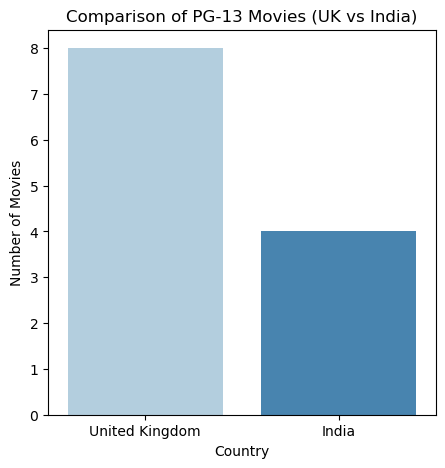

In [48]:
uk_india = pd.DataFrame({
    'country': ['United Kingdom', 'India'],
    'count': [len(filter_uk), len(filter_india)]
})

plt.figure(figsize=(5, 5))
sns.barplot(data=uk_india, x='country', y='count', hue='country', palette='Blues')

plt.title('Comparison of PG-13 Movies (UK vs India)')
plt.ylabel('Number of Movies')
plt.xlabel('Country')
plt.show()

Conclusion: After we cleaned the dataset and started exploring it, we initially believed that the United States and India were the top 2 countries in producing content for Netflix. As we began to dig further we saw that Netflix only had 500 PG-13 movies available on their platform with the United States being the largest producer of PG-13 movies and also a few movies being produced in multiple countries. As a result we found that only 3 PG-13 movies were produced in India even though they are the second largest country in producing content for Netflix. There were 8 PG-13 movies that were produced in the United Kingdom and they are the second largest country in producing PG-13 movies for Netflix.